# House Price Prediction

<img src='960x0.jpg' style=height:400px;>

Import *library*, *package*, dan *module* yang diperlukan dalam proses analisis dan prediksi harga rumah.

1. `numpy` : library yang digunakan dalam proses pengolahan array secara cepat. Ini adalah library penting untuk perhitungan data di python.
2. `pandas` : library untuk pengolahan Series dan DataFrame. Sangat cocok untuk melakukan data wrangling, data cleaning, data manipulation, dll.
3. `matplotlib` : library untuk plotting data. library ini cocok untuk menggambar berbagai macam tipe grafik di python.
4. `seaborn` : library untuk plotting data. Memiliki sintaks yang lebih mudah untuk dipahami.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Membaca file csv untuk train dan test data:

In [2]:
train_data = pd.read_csv('dataset/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('dataset/house-prices-advanced-regression-techniques/test.csv')

In [3]:
df = train_data.copy()
df_test = test_data.copy()

Metadata untuk dataset:

In [4]:
with open('dataset/house-prices-advanced-regression-techniques/data_description.txt') as file:
    ls_text = file.readlines()

for text in ls_text:
    print(text)

MSSubClass: Identifies the type of dwelling involved in the sale.	



        20	1-STORY 1946 & NEWER ALL STYLES

        30	1-STORY 1945 & OLDER

        40	1-STORY W/FINISHED ATTIC ALL AGES

        45	1-1/2 STORY - UNFINISHED ALL AGES

        50	1-1/2 STORY FINISHED ALL AGES

        60	2-STORY 1946 & NEWER

        70	2-STORY 1945 & OLDER

        75	2-1/2 STORY ALL AGES

        80	SPLIT OR MULTI-LEVEL

        85	SPLIT FOYER

        90	DUPLEX - ALL STYLES AND AGES

       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER

       150	1-1/2 STORY PUD - ALL AGES

       160	2-STORY PUD - 1946 & NEWER

       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER

       190	2 FAMILY CONVERSION - ALL STYLES AND AGES



MSZoning: Identifies the general zoning classification of the sale.

		

       A	Agriculture

       C	Commercial

       FV	Floating Village Residential

       I	Industrial

       RH	Residential High Density

       RL	Residential Low Density

       RP	Residential 

Metadata merupakan file yang menjelaskan fitur-fitur yang terdapat dalam data. File ini merupakan file yang penting untuk dijadikan referensi apabila kita hendak melakukan analisis terhadap data dan untuk membuat model dari data. Dengan adanya file ini, kita dapat mengerti kolom-kolom yang ada menjelaskan tentang apa.

### Exploratory Data Analysis (EDA)

Melihat bentuk data untuk melihat ada berapa baris dan kolom:

In [5]:
df.shape

(1460, 81)

Kita dapat mengetahui bahwa dalam dataset ini terdapat 1460 baris data dengan 81 kolom.

In [6]:
pd.options.display.max_columns

20

Karena default dari kolom yang akan diperlihatkan ketika kita memanggil DataFrame adalah 20, sedangkan dataset memiliki 81 kolom. Maka kita akan mengubah opsi untuk max_columns yang akan di display menjadi 81 kolom.

In [7]:
pd.set_option('display.max_columns', 81)

Melihat 5 data awal dan 5 data akhir dari dataset:

In [8]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


Dataset ini bukan merupakan data yang sudah siap untuk di training sehingga kita bisa mendapatkan model karena dengan melihat 5 data awal dan akhir kita dapat melihat bahwa masih terdapat *missing value* yaitu NaN, misalnya saja data NaN terdapat dalam kolom Alley, PoolQC, Fence, dan MiscFeature.

In [10]:
df.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN

Dengan menggunakan method describe, kita dapat melihat summary dari tiap kolom. Untuk kolom yang bernilai numerik, summary yang dapat dilihat antara lain count, mean, std, min, 25%, 50%, 75%, dan max. Sementara itu, untuk kolom yang bertipe objek/kategorikal, summary yang terisi adalah count, unique, top, dan freq saja. `include='all` yang terdapat dalam kode di atas, menyebabkan summary yang ditampilkan adalah data numerik dan objek sementara tanpa argumen tersebut, yang ditampilkan hanya kolom yang dianggap numerik.

Melihat jumlah kolom yang memiliki *missing value*:

In [11]:
sum(df.isnull().sum() > 0)

19

Melihat jumlah *missing value* tiap kolom

In [12]:
df.isnull().sum().sort_values(ascending=False).head(19)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [13]:
sum(test_data.isnull().sum() > 0)

33

In [14]:
test_data.isnull().sum().sort_values(ascending=False)

PoolQC         1456
MiscFeature    1408
Alley          1352
Fence          1169
FireplaceQu     730
               ... 
Electrical        0
CentralAir        0
HeatingQC         0
Foundation        0
Id                0
Length: 80, dtype: int64

Kolom-kolom diatas memiliki data yang masih memiliki nilai kosong, apabila kita akan menggunakannya dalam pembuatan model maka kita harus mengatasi nilai kosong dalam kolom tersebut.

Melihat unique value dari tiap kolom:

In [15]:
df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

Jumlah kolom yang unique valuenya tidak lebih dari 30:

In [16]:
sum(df.nunique() < 30)

61

Apabila terdapat 1460 data dan nilai uniknya hanya kurang dari 30, bisa dibilang kolom tersebut sebenarnya adalah kolom dengan tipe data kategori. Dalam dataset ini, 61 dari 81 kolom memiliki tipe data kategorikal.

Memisahkan kolom kategorikal dan numerikal dalam proses analisis:

In [17]:
cat_col = list((df.nunique() < 30).sort_values(ascending=False).head(61).index)
num_col = list((df.nunique() >= 30).sort_values(ascending=False).head(20).index)

Melihat tipe data dari `cat_col` dan `num_col`:

In [18]:
df[cat_col].dtypes

HeatingQC       object
BsmtFinType1    object
LotShape        object
LowQualFinSF     int64
LandContour     object
                 ...  
TotRmsAbvGrd     int64
KitchenQual     object
KitchenAbvGr     int64
BedroomAbvGr     int64
OverallCond      int64
Length: 61, dtype: object

In [19]:
df[num_col].dtypes

SalePrice          int64
GarageArea         int64
LotFrontage      float64
LotArea            int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
GrLivArea          int64
GarageYrBlt      float64
Id                 int64
EnclosedPorch      int64
WoodDeckSF         int64
OpenPorchSF        int64
ScreenPorch        int64
dtype: object

Pada `cat_col` terdapat kolom dengan data int64. Meskipun sebenarnya data ini mungkin kategorikal, sistem menganggap bahwa data tersebut bersifat numerikal.

Melihat distribusi dari kolom dengan data numerik:

In [20]:
# i = 1
# plt.figure(figsize=(20, 15))
# for column in num_col:
#     plt.subplot(4,5, i)
#     sns.distplot(df[column].dropna())
#     i +=1
# plt.tight_layout()
# plt.show()

In [21]:
# i = 1
# plt.figure(figsize=(20, 15))
# for column in num_col:
#     plt.subplot(4,5, i)
#     sns.distplot(np.log(df[column].dropna()+1))
#     i +=1
# plt.tight_layout()
# plt.show()

Dengan mengubah nilai data yang memiliki distribusi menceng kanan menjadi nilai logaritmik, terkadang kita dapat mengubah distribusi dari data tersebut menjadi distribusi yang lebih normal. Hal ini dapat kita lihat pada contoh data SalePrice, LotFrontage, LotArea, 1stFloor, dan GrLivArea.

Target dari proyek ini adalah untuk memprediksi nilai dari kolom `SalePrice`. Sehingga, kita akan melihat hubungan masing-masing kolom kategorikal dengan target kolom kita.

In [22]:
# i = 1
# plt.figure(figsize=(20, 60))
# for column in cat_col:
#     plt.subplot(16,4, i)
#     sns.boxplot(data=df, x=column, y='SalePrice')
#     plt.xticks(rotation=60)
#     i += 1
# plt.tight_layout()
# plt.show()

Beberapa kolom yang menarik antara lain:
1. HeatingQC : kolom ini memperlihatkan kualitas dari pemanas, semakin bagus kualitas kualitas pemanas ini maka harga dari rumah juga cenderung semakin tinggi
2. CentralAir : kolom ini menunjukan apakah rumah memiliki central air conditioning, rumah yang memiliki fasilitas ini cenderung memiliki harga yang lebih tinggi
3. OverallQual : menunjukan overall quality rumah dari rentang 1 - 10. Semakin tinggi overall quality maka harga rumah juga semakin tinggi

Kolom yang menjelaskan tentang kualitas dari suatu objek di rumah biasanya terdapat kata 'Qual' atau 'QC' dalam kolom tersebut (misalkan: BsmtQual, ExterQual, PoolQC, dll). Dalam kolom tersebut apabila kualitas objek semakin tinggi maka harga rumah cenderung semakin tinggi.

### Imputasi Data

**Mengisi kolom kategorikal yang kosong**

Kolom yang berisi data NaN yang memiliki makna bahwa tidak terdapat objek tersebut pada rumah berdasarkan metadata:

1. Alley
2. BsmtQual
3. BsmtCond
4. BsmtExposure
5. BsmtFinType1
6. BsmtFinType2
7. FireplaceQu
8. GarageType
9. GarageFinish
10. GarageQual
11. GarageCond
12. PoolQC
13. Fence
14. MiscFeature

Mengisi *missing value* kolom di atas dengan value NotAvail terhadap train data dan test data:

In [23]:
col_fill_na = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType',
               'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

for column in col_fill_na:
    df[column].fillna('NotAvail', inplace=True)
    test_data[column].fillna('NotAvail', inplace=True)

In [24]:
df.isnull().sum().sort_values(ascending=False).head(6)

LotFrontage    259
GarageYrBlt     81
MasVnrType       8
MasVnrArea       8
Electrical       1
SalePrice        0
dtype: int64

**Imputasi LotFrontage**

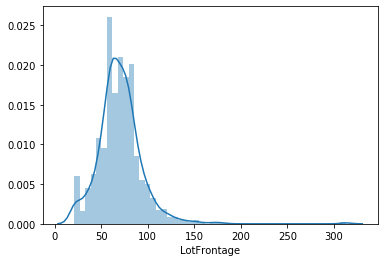

In [25]:
sns.distplot(df['LotFrontage'].dropna())
plt.show()

Kolom LotFrontage menjelaskan seberapa jauh rumah dengan jalan. Distribusi dari kolom ini adalah miring kanan, untuk kolom dengan distribusi ini akan lebih baik apabila kita mengisinya dengan nilai median dibandingkan dengan nilai rata-rata.

Mengisi kolom LotFrontage dengan nilai mediannya terhadap data train dan data test:

In [26]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median(skipna=True))
test_data['LotFrontage'] = test_data['LotFrontage'].fillna(df['LotFrontage'].median(skipna=True))

In [27]:
df.isnull().sum().sort_values(ascending=False).head(6)

GarageYrBlt    81
MasVnrType      8
MasVnrArea      8
Electrical      1
SalePrice       0
ExterCond       0
dtype: int64

**Imputasi GarageYrBlt**

Sebelumnya, kita telah mengisi *missing value* dari GarageType menjadi NotAvail karena memang properti tersebut tidak memiliki garasi. Kemungkinan besar, kolom GarageYrBlt ini berisi NaN value karena memang properti tidak memiliki garasi. Kita akan cek apakah kondisinya seperti itu:

In [28]:
df[['GarageYrBlt', 'GarageType']][df['GarageYrBlt'].isnull()]

,GarageYrBlt,GarageType
39,NaN,NotAvail
48,NaN,NotAvail
78,NaN,NotAvail
88,NaN,NotAvail
89,NaN,NotAvail
...,...,...
1349,NaN,NotAvail
1407,NaN,NotAvail
1449,NaN,NotAvail
1450,NaN,NotAvail


Seperti yang dapat kita lihat, nilai dari GarageYrBlt tidak ada karena memang properti tersebut tidak memiliki garasi. Berdasarkan hal tersebut, kita akan mengisi nilai GarageYrBlt yang NaN dengan nilai 0:

In [29]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
test_data['GarageYrBlt'] = test_data['GarageYrBlt'].fillna(0)

In [30]:
df.isnull().sum().sort_values(ascending=False).head(6)

MasVnrType    8
MasVnrArea    8
Electrical    1
SalePrice     0
Foundation    0
RoofMatl      0
dtype: int64

**Imputasi MasVnrType**

In [31]:
df['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

Kolom MasVnrType memiliki data yang bernilai None apabila properti tidak memiliki Masonry veneer type. Untuk data yang memiliki nilai NaN kita akan menganggap bahwa properti tersebut tidak memiliki Masonry veneer.

In [32]:
df['MasVnrType'] = df['MasVnrType'].fillna('None')
test_data['MasVnrType'] = test_data['MasVnrType'].fillna('None')

In [33]:
df.isnull().sum().sort_values(ascending=False).head(6)

MasVnrArea     8
Electrical     1
SalePrice      0
Foundation     0
RoofMatl       0
Exterior1st    0
dtype: int64

**Imputasi MasVnrArea**

Kita harus mengecek terlebih dahulu apakah nlai MasVnrArea yang kosong disebabkan oleh properti tersebut tidak memiliki Masonry veneer

In [34]:
df[['MasVnrType', 'MasVnrArea']][df['MasVnrArea'].isnull()]

,MasVnrType,MasVnrArea
234,None,NaN
529,None,NaN
650,None,NaN
936,None,NaN
973,None,NaN
977,None,NaN
1243,None,NaN
1278,None,NaN


Karena MasVnrArea yang *missing value* memang tidak memiliki MasVnrType. Kita akan mengisi nilai tersebut dengan nilai 0:

In [35]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
test_data['MasVnrArea'] = test_data['MasVnrArea'].fillna(0)

In [36]:
df.isnull().sum().sort_values(ascending=False).head(6)

Electrical     1
SalePrice      0
Foundation     0
RoofMatl       0
Exterior1st    0
Exterior2nd    0
dtype: int64

**Imputasi Electrical**

In [37]:
df['Electrical'].mode().values[0]

'SBrkr'

In [38]:
df[df['Electrical'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,NotAvail,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NotAvail,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NotAvail,NotAvail,NotAvail,0,5,2008,WD,Normal,167500


Kita akan mengisi nilai Electrical yang kosong menggunakan mode dari data tersebut:

In [39]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode().values[0])
test_data['Electrical'] = test_data['Electrical'].fillna(df['Electrical'].mode().values[0])

In [40]:
df.isnull().sum().sort_values(ascending=False).head(6)

SalePrice      0
Heating        0
RoofStyle      0
RoofMatl       0
Exterior1st    0
Exterior2nd    0
dtype: int64

### *Missing Value* pada data test

In [41]:
sum(test_data.isnull().sum().sort_values(ascending=False) > 0)

15

In [42]:
test_data_col_na = list(test_data.isnull().sum().sort_values(ascending=False).head(15).index)

In [43]:
df[test_data_col_na].dtypes

MSZoning        object
Functional      object
Utilities       object
BsmtFullBath     int64
BsmtHalfBath     int64
TotalBsmtSF      int64
SaleType        object
GarageArea       int64
Exterior1st     object
BsmtUnfSF        int64
Exterior2nd     object
KitchenQual     object
GarageCars       int64
BsmtFinSF2       int64
BsmtFinSF1       int64
dtype: object

Kita akan mengisi *missing value* kolom yang bertipe kategori dengan mode dan data yang bertipe numerik dengan median

In [44]:
ls_test_col_na_cat = []
ls_test_col_na_num = []
for column in test_data_col_na:
    if column in cat_col:
        ls_test_col_na_cat.append(column)
    else:
        ls_test_col_na_num.append(column)

In [45]:
for column in ls_test_col_na_cat:
    test_data[column] = test_data[column].fillna(df[column].mode().values[0])
for column in ls_test_col_na_num:
    test_data[column] = test_data[column].fillna(df[column].median())

In [46]:
test_data.isnull().sum().sort_values(ascending=False).head()

SaleCondition    0
SaleType         0
RoofStyle        0
RoofMatl         0
Exterior1st      0
dtype: int64

Kita sudah berhasil mengisi *missing value* untuk data test dan data train. Selanjutnya, kita akan melakukan feature engineering untuk memilih feature apa saja yang akan digunakan dalam pembuatan model.

**CATATAN:** sampai pada tahap ini tugas 3 dan tugas 4 tidak berbeda. Perbedaan dari keduanya, terdapat pada proses feature engineering yang dilakukan.

### Feature Engineering

Kita tidak akan menggunakan kolom id, karena kolom tersebut merupakan nilai unik dari masing-masing data dan tidak dapat dijadikan sebagai fitur dalam pembuatan sebuah model. Oleh karena itu, kita akan drop kolom tersebut:

In [47]:
df.drop('Id', axis=1, inplace=True)
test_data.drop('Id', axis=1, inplace=True)

Kita ingin memilih feature numerik yang memiliki distribusi mendekati normal. Kita dapat mengecek skewness dari sebuah distribusi data menggunakan method .skew(). Kemudian, kita akan membandingkannya apabila data tersebut kita lakukan log-transform. Apabila skewness dari data yang telah di log-transform lebih kecil daripada data tanpa log-transform maka kita akan menggunakan data yang telah di log-transform. Sebaliknya, apabila skewness dari data tanpa log-transform lebih mendekati 0 dibandingkan data yang telah di log-transform maka kita akan menggunakan data tanpa log-transform.

In [48]:
num_col.pop(num_col.index('Id'))

'Id'

**Log transformation**

In [49]:
tanpa_log_transform = df.select_dtypes('number').skew().abs()
tanpa_log_transform

MSSubClass        1.407657
LotFrontage       2.409147
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt         0.613461
YearRemodAdd      0.503562
MasVnrArea        2.677616
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt       3.869501
GarageCars        0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
SalePrice         1.882876
d

In [50]:
dengan_log_transform = np.log(df.select_dtypes('number') + 1).skew().abs()
dengan_log_transform

MSSubClass        0.248997
LotFrontage       0.870006
LotArea           0.137404
OverallQual       0.590977
OverallCond       0.254015
YearBuilt         0.641129
YearRemodAdd      0.511005
MasVnrArea        0.503532
BsmtFinSF1        0.618410
BsmtFinSF2        2.523694
BsmtUnfSF         2.186504
TotalBsmtSF       5.154670
1stFlrSF          0.080114
2ndFlrSF          0.289643
LowQualFinSF      7.460317
GrLivArea         0.006140
BsmtFullBath      0.419213
BsmtHalfBath      3.933064
FullBath          0.394635
HalfBath          0.566168
BedroomAbvGr      1.233677
KitchenAbvGr      3.869414
TotRmsAbvGrd      0.058258
Fireplaces        0.182083
GarageYrBlt       3.887413
GarageCars        1.370219
GarageArea        3.482604
WoodDeckSF        0.153537
OpenPorchSF       0.023397
EnclosedPorch     2.112275
3SsnPorch         7.734975
ScreenPorch       3.150409
PoolArea         14.363102
MiscVal           5.170704
MoSold            0.913424
YrSold            0.095475
SalePrice         0.121347
d

In [51]:
df_skew = pd.DataFrame({
    'tanpa_log_transform':tanpa_log_transform,
    'dengan_log_transform':dengan_log_transform,
})
df_skew

,tanpa_log_transform,dengan_log_transform
MSSubClass,1.407657,0.248997
LotFrontage,2.409147,0.870006
LotArea,12.207688,0.137404
OverallQual,0.216944,0.590977
OverallCond,0.693067,0.254015
YearBuilt,0.613461,0.641129
YearRemodAdd,0.503562,0.511005
MasVnrArea,2.677616,0.503532
BsmtFinSF1,1.685503,0.618410
BsmtFinSF2,4.255261,2.523694


Dapat dilihat dari data skewness sesudah dan sebelum dilakukan log-transform, terdapat beberapa data yang skewnessnya berkurang sesudah ditransformasi. Misalkan, data LotFrontage yang nilai skew awal sebesar 2.4 menjadi 0.8 (Catatan: semakin nilai skewness mendekati 0 maka distribusi data semakin mendektai normal). Namun, ada juga data yang setelah ditransformasi, skewnessnya bertambah. Misalkan, GarageArea yang awalnya bernilai 0.18 menjadi 3.5.

Membuat list kolom yang akan diubah menjadi nilai logaritmik (kolom yang skewness nya lebih kecil ketika dilakukan log transformation) :

In [52]:
kolom_log_transformasi = []
for feature, nilai in zip(df_skew.index, df_skew.values):
    if nilai[0] > nilai[1]:
        kolom_log_transformasi.append(feature)

In [53]:
kolom_log_transformasi

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'YrSold',
 'SalePrice']

Melakukan log-transform terhadap kolom-kolom yang sudah ditentukan:

In [54]:
for column in kolom_log_transformasi:
    df[column] = np.log(df[column] + 1)

Kita telah berhasil melakukan transformasi log terhadap kolom-kolom yang datanya akan menjadi lebih terdistribusi secara normal. Selanjutnya, kita akan melihat korelasi dari data numerik terhadap SalePrice.

**StandarScaling Feature dan Target**

In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,4.110874,RL,4.189655,9.042040,Pave,NotAvail,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,1.791759,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.283204,Gd,TA,PConc,Gd,TA,No,GLQ,6.561031,Unf,0.000000,150,856,GasA,Ex,Y,SBrkr,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,2,0.693147,3,0.693147,Gd,2.197225,Typ,0.000000,NotAvail,Attchd,2003.0,RFn,2,548,TA,TA,Y,0.000000,4.127134,0.000000,0.0,0.0,0.0,NotAvail,NotAvail,NotAvail,0.000000,2,7.605392,WD,Normal,12.247699
1,3.044522,RL,4.394449,9.169623,Pave,NotAvail,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,2.197225,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,6.886532,Unf,0.000000,284,1262,GasA,Ex,Y,SBrkr,7.141245,0.000000,0.0,7.141245,0.000000,0.693147,2,0.000000,3,0.693147,TA,1.945910,Typ,0.693147,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,5.700444,0.000000,0.000000,0.0,0.0,0.0,NotAvail,NotAvail,NotAvail,0.000000,5,7.604894,WD,Normal,12.109016
2,4.110874,RL,4.234107,9.328212,Pave,NotAvail,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,1.791759,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.093750,Gd,TA,PConc,Gd,TA,Mn,GLQ,6.188264,Unf,0.000000,434,920,GasA,Ex,Y,SBrkr,6.825460,6.765039,0.0,7.488294,0.693147,0.000000,2,0.693147,3,0.693147,Gd,1.945910,Typ,0.693147,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0.000000,3.761200,0.000000,0.0,0.0,0.0,NotAvail,NotAvail,NotAvail,0.000000,9,7.605392,WD,Normal,12.317171
3,4.262680,RL,4.110874,9.164401,Pave,NotAvail,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,1.791759,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,5.379897,Unf,0.000000,540,756,GasA,Gd,Y,SBrkr,6.869014,6.629363,0.0,7.448916,0.693147,0.000000,1,0.000000,3,0.693147,Gd,2.079442,Typ,0.693147,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0.000000,3.583519,5.609472,0.0,0.0,0.0,NotAvail,NotAvail,NotAvail,0.000000,2,7.604396,WD,Abnorml,11.849405
4,4.110874,RL,4.442651,9.565284,Pave,NotAvail,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,1.791759,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.860786,Gd,TA,PConc,Gd,TA,Av,GLQ,6.486161,Unf,0.000000,490,1145,GasA,Ex,Y,SBrkr,7.044033,6.960348,0.0,7.695758,0.693147,0.000000,2,0.693147,4,0.693147,Gd,2.302585,Typ,0.693147,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,5.262690,4.442651,0.000000,0.0,0.0,0.0,NotAvail,NotAvail,NotAvail,0.000000,12,7.605392,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.110874,RL,4.143135,8.976894,Pave,NotAvail,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,1.791759,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,PConc,Gd,TA,No,Unf,0.000000,Unf,0.000000,953,953,GasA,Ex,Y,SBrkr,6.860664,6.543912,0.0,7.407318,0.000000,0.000000,2,0.693147,3,0.693147,TA,2.079442,Typ,0.693147,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0.000000,3.713572,0.000000,0.0,0.0,0.0,NotAvail,NotAvail,Not

**Melihat korelasi fitur numerik dengan SalePrice**

Korelasi adalah teknik analisis dalam statistik yang digunakan untuk melihat hubungan dari dua buah variabel. Rentang dari korelasi adalah 0 - 1. Nilai korelasi 1 artinya dua variabel berkorelasi secara sempurna, sedangnka nilai 0 berarti dua variabel tidak memiliki korelasi sama sekali. Hampir tidak ada dua variabel yang berbeda memiliki nilai korelasi sama dengan 1. Korelasi 1 terjadi ketika suatu variabel dicari nilai korelasinya dengan variabel itu sendiri.

In [55]:
corr_SalePrice = df.corr()['SalePrice'].abs().sort_values(ascending=False)
corr_SalePrice

SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.730254
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.608955
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
TotRmsAbvGrd     0.539998
Fireplaces       0.508925
OpenPorchSF      0.459948
MasVnrArea       0.413318
LotArea          0.399923
GarageYrBlt      0.349013
LotFrontage      0.346237
WoodDeckSF       0.343039
HalfBath         0.320925
BsmtFullBath     0.238945
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
BsmtFinSF1       0.208099
EnclosedPorch    0.207263
2ndFlrSF         0.180778
KitchenAbvGr     0.144278
ScreenPorch      0.105857
PoolArea         0.069949
MiscVal          0.067054
3SsnPorch        0.058827
MoSold           0.057330
LowQualFinSF     0.054513
YrSold           0.037261
BsmtFinSF2       0.030361
MSSubClass       0.020279
BsmtHalfBath     0.004890
OverallCond      0.001794
Name: SalePrice, dtype: float64

Untuk sementara, kita akan menggunakan kolom yang memiliki korelasi dengan SalePrice di atas 0.5. Kita dapat mengubah threshold dari korelasi yang digunakan nanti untuk mencari akurasi terhadap test data yang lebih tinggi. 

Hanya mengambil kolom numerik yang memiliki korelasi > 0.5 dengan SalePrice:

**Catatan:**

Salah satu perbedaan dengan tugas 3, tugas 4 menggunakan kolom yang memiliki korelasi di atas 0.1, dengan seperti ini semakin banyak feature yang akan digunakan dalam pembuatan model

In [56]:
kolom_korelasi = []

for feature, nilai in zip(corr_SalePrice.index, corr_SalePrice.values):
    if nilai > 0.1:
        kolom_korelasi.append(feature)

In [57]:
len(kolom_korelasi)

27

In [58]:
kolom_korelasi

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'YearBuilt',
 'YearRemodAdd',
 'TotRmsAbvGrd',
 'Fireplaces',
 'OpenPorchSF',
 'MasVnrArea',
 'LotArea',
 'GarageYrBlt',
 'LotFrontage',
 'WoodDeckSF',
 'HalfBath',
 'BsmtFullBath',
 'BsmtUnfSF',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'EnclosedPorch',
 '2ndFlrSF',
 'KitchenAbvGr',
 'ScreenPorch']

**Korelasi kolom kategorikal dengan SalePrice**

Sama halnya dengan kolom numerik, kita juga akan mencari korelasi kolom kategorikal dengan SalePrice. Akan tetapi, sebelum dihitung korelasinya, data kategorikal harus dilakukan label encoder terlebih dahulu. Dalam kasus ini, kita akan melakukan one hot encoder terhadap kolom kategorikal dengan menggunakan method dari pandas yaitu get_dummies.

In [59]:
cat_dummies = pd.get_dummies(df.select_dtypes('object'))
cat_dummies['SalePrice'] = df['SalePrice'].copy()
cat_dummies.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_NotAvail,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,...,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_NotAvail,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_NotAvail,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NotAvail,MiscFeature_Gar2,MiscFeature_NotAvail,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,12.247699
1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,12.109016
2,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,12.317171
3,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,11.849405
4,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,12.429220


Seperti yang dapat dilihat, get dummies menyebabkan Kolom MSZoning yang awalnya memiliki 4 nilai unik dijadikan 4 kolom yang berbeda yaitu MSZoning_C(all), MSZoning_FV, MSZoning_RH, dan MSZoning_RL. Untuk data pertama, Nilai dari kolom MSZoning adalah RL. Oleh karena itu, nilai MSZoning_RH akan bernilai satu dan MSZoning yang lainnya bernilai 0. Hal ini dilakukan terhadap seluruh kolom kategorikal lainnya. Dari hasil one hot encoder, dihasilkan data frame dengan jumlah kolom sebanyak 267.

Data kategorikal yang telah di one hot encoder, kemudian dilihat korelasinya dengan SalePrice:

In [60]:
cat_dummies_corr = cat_dummies.corr()['SalePrice'].abs().sort_values(ascending=False)
cat_dummies_corr

SalePrice               1.000000
ExterQual_TA            0.595882
KitchenQual_TA          0.538237
Foundation_PConc        0.530840
FireplaceQu_NotAvail    0.510026
                          ...   
LotConfig_Corner        0.003985
SaleType_ConLI          0.003058
RoofMatl_ClyTile        0.002696
BsmtFinType2_GLQ        0.002345
MiscFeature_Gar2        0.001624
Name: SalePrice, Length: 267, dtype: float64

**Catatan:**

Kita akan memilih korelasi yang lebih besar dari 0.1. Hal ini juga yang menjadi perbedaan antara tugas 3 dan tugas 4:

In [61]:
korelasi_kategorikal = []
for feature, nilai in zip(cat_dummies_corr.index, cat_dummies_corr.values):
    if nilai > 0.1:
        korelasi_kategorikal.append(feature)

In [62]:
korelasi_kategorikal

['SalePrice',
 'ExterQual_TA',
 'KitchenQual_TA',
 'Foundation_PConc',
 'FireplaceQu_NotAvail',
 'ExterQual_Gd',
 'BsmtQual_TA',
 'HeatingQC_Ex',
 'BsmtQual_Ex',
 'BsmtFinType1_GLQ',
 'GarageFinish_Unf',
 'GarageFinish_Fin',
 'GarageType_Attchd',
 'KitchenQual_Ex',
 'KitchenQual_Gd',
 'GarageType_Detchd',
 'MasVnrType_None',
 'GarageCond_TA',
 'ExterQual_Ex',
 'Neighborhood_NridgHt',
 'CentralAir_Y',
 'CentralAir_N',
 'MSZoning_RM',
 'FireplaceQu_Gd',
 'Foundation_CBlock',
 'Exterior2nd_VinylSd',
 'Exterior1st_VinylSd',
 'HeatingQC_TA',
 'BsmtQual_Gd',
 'GarageQual_TA',
 'SaleType_New',
 'SaleCondition_Partial',
 'GarageType_NotAvail',
 'GarageCond_NotAvail',
 'GarageFinish_NotAvail',
 'GarageQual_NotAvail',
 'MasVnrType_Stone',
 'Electrical_SBrkr',
 'PavedDrive_Y',
 'MSZoning_RL',
 'LotShape_Reg',
 'PavedDrive_N',
 'Neighborhood_NoRidge',
 'BsmtExposure_Gd',
 'HouseStyle_2Story',
 'Foundation_BrkTil',
 'LotShape_IR1',
 'Electrical_FuseA',
 'GarageFinish_RFn',
 'BsmtExposure_No',
 'Nei

In [63]:
korelasi_kategorikal.pop(korelasi_kategorikal.index('SalePrice'))

'SalePrice'

In [64]:
kolom_digunakan = kolom_korelasi.copy()
for kolom in korelasi_kategorikal:
    kolom_digunakan.append(kolom)

In [65]:
kolom_digunakan

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'YearBuilt',
 'YearRemodAdd',
 'TotRmsAbvGrd',
 'Fireplaces',
 'OpenPorchSF',
 'MasVnrArea',
 'LotArea',
 'GarageYrBlt',
 'LotFrontage',
 'WoodDeckSF',
 'HalfBath',
 'BsmtFullBath',
 'BsmtUnfSF',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'EnclosedPorch',
 '2ndFlrSF',
 'KitchenAbvGr',
 'ScreenPorch',
 'ExterQual_TA',
 'KitchenQual_TA',
 'Foundation_PConc',
 'FireplaceQu_NotAvail',
 'ExterQual_Gd',
 'BsmtQual_TA',
 'HeatingQC_Ex',
 'BsmtQual_Ex',
 'BsmtFinType1_GLQ',
 'GarageFinish_Unf',
 'GarageFinish_Fin',
 'GarageType_Attchd',
 'KitchenQual_Ex',
 'KitchenQual_Gd',
 'GarageType_Detchd',
 'MasVnrType_None',
 'GarageCond_TA',
 'ExterQual_Ex',
 'Neighborhood_NridgHt',
 'CentralAir_Y',
 'CentralAir_N',
 'MSZoning_RM',
 'FireplaceQu_Gd',
 'Foundation_CBlock',
 'Exterior2nd_VinylSd',
 'Exterior1st_VinylSd',
 'HeatingQC_TA',
 'BsmtQual_Gd',
 'GarageQual_TA',
 'SaleType_New',
 'SaleCondi

`kolom_digunakan` adalah kolom yang akan digunakan dalam pembuatan model regresi linear untuk memprediksi harga dari rumah.

### Persiapan modelling

Membuat train dataset dengan fitur-fitur yang terdapat di `kolom_digunakan`:

In [66]:
modeled_dataset = pd.get_dummies(df)[kolom_digunakan].copy()

modeled_dataset.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,TotRmsAbvGrd,Fireplaces,OpenPorchSF,MasVnrArea,LotArea,GarageYrBlt,LotFrontage,WoodDeckSF,HalfBath,BsmtFullBath,BsmtUnfSF,BedroomAbvGr,BsmtFinSF1,EnclosedPorch,2ndFlrSF,KitchenAbvGr,ScreenPorch,ExterQual_TA,KitchenQual_TA,Foundation_PConc,FireplaceQu_NotAvail,ExterQual_Gd,BsmtQual_TA,HeatingQC_Ex,BsmtQual_Ex,BsmtFinType1_GLQ,GarageFinish_Unf,GarageFinish_Fin,GarageType_Attchd,KitchenQual_Ex,...,SaleCondition_Abnorml,BsmtQual_Fa,Foundation_Slab,Fence_MnPrv,Neighborhood_MeadowV,Heating_Grav,LotConfig_CulDSac,Exterior1st_AsbShng,BsmtExposure_Av,Neighborhood_Timber,BsmtCond_TA,BsmtFinType1_Rec,Heating_GasA,Exterior2nd_AsbShng,Functional_Typ,BldgType_1Fam,Alley_NotAvail,BsmtFinType1_BLQ,Condition1_Artery,ExterCond_TA,HeatingQC_Gd,Neighborhood_BrDale,LotShape_IR2,Condition1_Feedr,Neighborhood_Sawyer,BsmtFinType2_Unf,MSZoning_FV,RoofMatl_WdShngl,Condition1_Norm,Neighborhood_CollgCr,Fence_GdWo,BldgType_Duplex,LandContour_Bnk,LandContour_HLS,BldgType_2fmCon,BldgType_Twnhs,BsmtCond_Gd,HouseStyle_1.5Unf,Functional_Maj2,SaleCondition_Normal
0,12.247699,7,7.444833,2,548,856,6.753438,2,2003,2003,2.197225,0.000000,4.127134,5.283204,9.042040,2003.0,4.189655,0.000000,0.693147,0.693147,150,3,6.561031,0.000000,6.751101,0.693147,0.0,0,0,1,1,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1
1,12.109016,6,7.141245,2,460,1262,7.141245,2,1976,1976,1.945910,0.693147,0.000000,0.000000,9.169623,1976.0,4.394449,5.700444,0.000000,0.000000,284,3,6.886532,0.000000,0.000000,0.693147,0.0,1,1,0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,12.317171,7,7.488294,2,608,920,6.825460,2,2001,2002,1.945910,0.693147,3.761200,5.093750,9.328212,2001.0,4.234107,0.000000,0.693147,0.693147,434,3,6.188264,0.000000,6.765039,0.693147,0.0,0,0,1,0,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1
3,11.849405,7,7.448916,3,642,756,6.869014,1,1915,1970,2.079442,0.693147,3.583519,0.000000,9.164401,1998.0,4.110874,0.000000,0.000000,0.693147,540,3,5.379897,5.609472,6.629363,0.693147,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,12.429220,8,7.695758,3,836,1145,7.044033,2,2000,2000,2.302585,0.693147,4.442651,5.860786,9.565284,2000.0,4.442651,5.262690,0.693147,0.693147,490,4,6.486161,0.000000,6.960348,0.693147,0.0,0,0,1,0,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1


Kini `modeled_dataset` sudah berisikan kolom-kolom yang akan digunakan untuk proses modeling.

Memisahkan target dan features ke dalam variabel X dan y:

In [67]:
y = modeled_dataset['SalePrice'].values

X = modeled_dataset.drop('SalePrice', axis=1).values

### Modelling with Deep Learning Model

In [68]:
# load library

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [69]:
X.shape

(1460, 150)

In [70]:
model = Sequential()
model.add(Dense(input_dim=150, units=1, kernel_initializer='uniform', activation='linear'))
sgd = SGD(learning_rate=0.01)
model.compile(optimizer='adam', loss='mse')

In [71]:
model.fit(X, y, epochs=100)

Epoch 1/100
1460/1460 [==============================] - 0s 202us/step - loss: 132.7852
Epoch 2/100
1460/1460 [==============================] - 0s 96us/step - loss: 2.9450
Epoch 3/100
1460/1460 [==============================] - 0s 88us/step - loss: 0.2578
Epoch 4/100
1460/1460 [==============================] - 0s 91us/step - loss: 0.2103
Epoch 5/100
1460/1460 [==============================] - 0s 99us/step - loss: 0.2034
Epoch 6/100
1460/1460 [==============================] - 0s 92us/step - loss: 0.1706
Epoch 7/100
1460/1460 [==============================] - 0s 93us/step - loss: 0.1627
Epoch 8/100
1460/1460 [==============================] - 0s 92us/step - loss: 0.1422
Epoch 9/100
1460/1460 [==============================] - 0s 97us/step - loss: 0.1334
Epoch 10/100
1460/1460 [==============================] - 0s 94us/step - loss: 0.1454
Epoch 11/100
1460/1460 [==============================] - 0s 91us/step - loss: 0.1164
Epoch 12/100
1460/1460 [==============================] - 0s

1460/1460 [==============================] - 0s 92us/step - loss: 0.0522
Epoch 97/100
1460/1460 [==============================] - 0s 94us/step - loss: 0.1540
Epoch 98/100
1460/1460 [==============================] - 0s 85us/step - loss: 0.2340
Epoch 99/100
1460/1460 [==============================] - 0s 90us/step - loss: 0.0803
Epoch 100/100
1460/1460 [==============================] - 0s 97us/step - loss: 0.0755


### Prediksi data test

Tujuan dari proyek ini adalah untuk dapat memprediksi harga rumah dari data yang belum pernah dilihat sama sekali oleh model. Data yang belum dilihat sama sekali ini terdapat pada variabel `test_data`. Kita akan memprediksi harga rumah yang terdapat pada test_data.

**Persiapan Data Test**

Sebelum melakukan prediksi, data test harus kita ubah formatnya persis seperti variabel X, yaitu fitur `modeled_dataset`

In [72]:
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NotAvail,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NotAvail,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NotAvail,MnPrv,NotAvail,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NotAvail,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NotAvail,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NotAvail,NotAvail,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NotAvail,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NotAvail,MnPrv,NotAvail,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NotAvail,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NotAvail,NotAvail,NotAvail,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NotAvail,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NotAvail,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NotAvail,NotAvail,NotAvail,0,1,2010,WD,Normal


Pertama untuk menyamakan format test data dengan X, kita akan melakukan log-transformasi terhadap kolom-kolom yang terdapat di `kolom_log_transformasi` pada test_data. Akan tetapi, kita tidak akan menggunakan transformasi ini terhadap SalePrice, karena test_data tentu saja tidak memiliki kolom ini. Oleh karena itu, kita harus membuang SalePrice dari `kolom_log_transformasi`:

In [73]:
kolom_log_transformasi_test_data = kolom_log_transformasi.copy()
kolom_log_transformasi_test_data.remove('SalePrice')

Proses log transformasi terhadap test_data:

In [74]:
for kolom in kolom_log_transformasi_test_data:
    test_data[kolom] = np.log1p(test_data[kolom])

Setelah melakukan log transformasi, kita akan melakukan one hot encoder terhadap test_data dan kemudian hanya mengambil kolom yang terdapat pada variabel `kolom_digunakan` tanpa mengambil kolom SalePrice, karena tentu saja kolom SalePrice tidak terdapat pada test_data (justru kolom ini adalah kolom yang hendak kita prediksi).

In [75]:
kolom_digunakan_test_data = kolom_digunakan.copy()
kolom_digunakan_test_data.remove('SalePrice')

In [76]:
test_data_modeled = pd.get_dummies(test_data)[kolom_digunakan_test_data]
test_data_modeled.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,TotRmsAbvGrd,Fireplaces,OpenPorchSF,MasVnrArea,LotArea,GarageYrBlt,LotFrontage,WoodDeckSF,HalfBath,BsmtFullBath,BsmtUnfSF,BedroomAbvGr,BsmtFinSF1,EnclosedPorch,2ndFlrSF,KitchenAbvGr,ScreenPorch,ExterQual_TA,KitchenQual_TA,Foundation_PConc,FireplaceQu_NotAvail,ExterQual_Gd,BsmtQual_TA,HeatingQC_Ex,BsmtQual_Ex,BsmtFinType1_GLQ,GarageFinish_Unf,GarageFinish_Fin,GarageType_Attchd,KitchenQual_Ex,KitchenQual_Gd,...,SaleCondition_Abnorml,BsmtQual_Fa,Foundation_Slab,Fence_MnPrv,Neighborhood_MeadowV,Heating_Grav,LotConfig_CulDSac,Exterior1st_AsbShng,BsmtExposure_Av,Neighborhood_Timber,BsmtCond_TA,BsmtFinType1_Rec,Heating_GasA,Exterior2nd_AsbShng,Functional_Typ,BldgType_1Fam,Alley_NotAvail,BsmtFinType1_BLQ,Condition1_Artery,ExterCond_TA,HeatingQC_Gd,Neighborhood_BrDale,LotShape_IR2,Condition1_Feedr,Neighborhood_Sawyer,BsmtFinType2_Unf,MSZoning_FV,RoofMatl_WdShngl,Condition1_Norm,Neighborhood_CollgCr,Fence_GdWo,BldgType_Duplex,LandContour_Bnk,LandContour_HLS,BldgType_2fmCon,BldgType_Twnhs,BsmtCond_Gd,HouseStyle_1.5Unf,Functional_Maj2,SaleCondition_Normal
0,5,6.799056,1.0,730.0,882.0,6.799056,1,1961,1961,1.791759,0.000000,0.000000,0.000000,9.360741,1961.0,4.394449,4.948760,0.000000,0.0,270.0,2,6.150603,0.0,0.000000,0.693147,4.795791,1,1,0,1,0,1,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0,1,1,1,0,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,6,7.192934,1.0,312.0,1329.0,7.192934,1,1958,1958,1.945910,0.000000,3.610918,4.691348,9.565775,1958.0,4.406719,5.976351,0.693147,0.0,406.0,3,6.828712,0.0,0.000000,0.693147,0.000000,1,0,0,1,0,1,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,5,7.396335,2.0,482.0,928.0,6.834109,2,1997,1998,1.945910,0.693147,3.555348,0.000000,9.534668,1997.0,4.317488,5.361292,0.693147,0.0,137.0,3,6.674561,0.0,6.553933,0.693147,0.000000,1,1,1,0,0,0,0,0,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,6,7.380879,2.0,470.0,926.0,6.831954,2,1998,1998,2.079442,0.693147,3.610918,3.044522,9.208238,1998.0,4.369448,5.888878,0.693147,0.0,324.0,3,6.401917,0.0,6.520621,0.693147,0.000000,1,0,1,0,0,1,1,0,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,8,7.155396,2.0,506.0,1280.0,7.155396,2,1992,1992,1.791759,0.000000,4.418841,0.000000,8.518392,1992.0,3.784190,0.000000,0.000000,0.0,1017.0,2,5.575949,0.0,0.000000,0.693147,4.976734,0,0,1,1,1,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1


Sekarang test_data sudah dalam bentuk yang sama dengan X dan kita menyimpannya dalam variabel `test_data_modeled`. Data ini kemudian akan kita coba untuk prediksi.

**Prediksi**

Melakukan prediksi dengan model `linreg` terhadap variabel `test_data_modeled` dan menyimpan hasil prediksi pada variabel `prediksi`:

In [77]:
prediksi = model.predict(test_data_modeled.values)

In [78]:
prediksi

array([[11.781662],
       [11.969261],
       [12.086325],
       ...,
       [11.848455],
       [12.006867],
       [12.281621]], dtype=float32)

Karena kita telah mengubah harga rumah ke dalam bentuk np.log(harga rumah + 1), kita akan mengembalikannya menjadi ke bentuk semula dengan cara melakukan dengan cara:

In [79]:
harga_rumah_prediksi = np.exp(prediksi) - 1

In [80]:
harga_rumah_prediksi

array([[130830.04],
       [157827.02],
       [177427.8 ],
       ...,
       [139867.14],
       [163875.34],
       [215694.08]], dtype=float32)

In [86]:
harga_rumah_prediksi = harga_rumah_prediksi.reshape(1459)

Terakhir, kita akan membuat dataframe yang sesuai dengan format submission untuk kompetisi prediksi harga rumah ini di Kaggle:

In [81]:
import pandas as pd

In [87]:
kaggle_submission = pd.DataFrame({
    "Id": df_test['Id'],
    "SalePrice": harga_rumah_prediksi
})

# lihat hasil kaggle_submission
kaggle_submission

,Id,SalePrice
0,1461,130830.039062
1,1462,157827.015625
2,1463,177427.796875
3,1464,221027.828125
4,1465,250474.906250
...,...,...
1454,2915,97249.414062
1455,2916,84589.335938
1456,2917,139867.140625
1457,2918,163875.343750


Menyimpan dataframe yang sudah dibuat ke dalam format file csv:

In [88]:
kaggle_submission.to_csv('hasil_prediksi_rumah.csv', index=False)

**Hasil Submission Kaggle**

<img src='hasil_prediksi2.PNG'>

Dengan mengatur jumlah feature (yang dilakukan saat feature engineering) kita dapat memperbaiki model regresi linear yang kita hasilkan. Dalam kasus ini, feature engineering yang dilakukan adalah mengubah nilai threshold dari correlation terhadap SalePrice yang mulanya 0.5 menjadi 0.1